In [80]:
import os.path
import sys

import os

# Récupère le chemin d'accès parent de sys.path[0]
parent_dir = os.path.dirname(sys.path[0])

sys.path.append(os.path.abspath(parent_dir))
import importlib
import algorithmes
importlib.reload(algorithmes)
from algorithmes import *
import random
import mesa
import bisect

import gym
import numpy as np
import random
import tensorflow as tf
from collections import deque


In [81]:
nombre_client  = 10

STATE_SIZE = 6400
ACTION_SIZE = 3
LEARNING_RATE = 0.001
GAMMA = 0.99
BATCH_SIZE = 32
MEMORY_SIZE = 1000000


In [82]:
  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [83]:
# Extraire tous les arcs de la route
route = [[0,1,2,3,4],[8,6,7],[5,9]]
arcs_voiture = set()
for sous_route in route:
    sous_route = [0]+sous_route+[0]
    arcs_voiture.update(set(zip(sous_route, sous_route[1:])))

# Initialiser la matrice d'adjacence avec des zéros
n = max(list(itertools.chain.from_iterable(route)))+1
matrice_adj = [[0]*n for _ in range(n)]

# Mettre à jour les valeurs correspondantes à chaque arc
for i, j in arcs_voiture:
    matrice_adj[i][j] = 1
    #matrice_adj[i][j] = matrice_temps_Cij[i][j]
     
    
print(np.array(matrice_adj))

[[1 1 0 0 0 1 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


In [84]:
def get_matrice_adjacence(route):
     

    # Extraire tous les arcs de la route
    arcs_voiture = set()
    for sous_route in route:
        sous_route = [-1]+sous_route+[-1]
        arcs_voiture.update(set(zip(sous_route, sous_route[1:])))

    # Initialiser la matrice d'adjacence avec des zéros
    n = max(list(itertools.chain.from_iterable(route)))+2
    matrice_adj = [[0]*n for _ in range(n)]

    # Mettre à jour les valeurs correspondantes à chaque arc
    for i, j in arcs_voiture:
        matrice_adj[i+1][j+1] = 1
        #matrice_adj[i+1][j+1] = matrice_temps_Cij[i][j]
        
        
    
    return(np.array(matrice_adj))


In [85]:
get_matrice_adjacence(route)

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

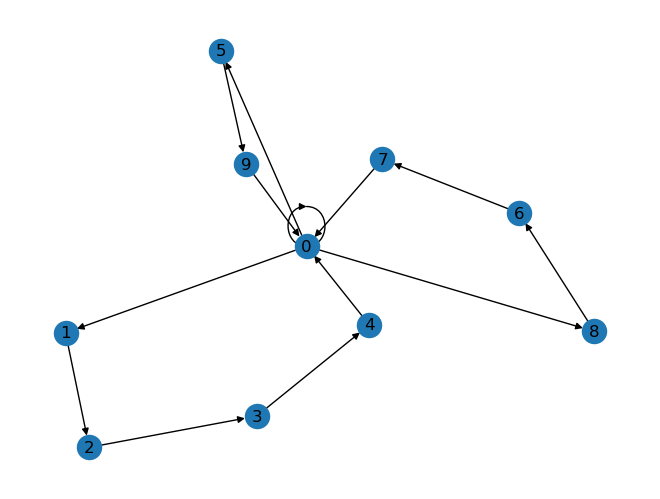

In [86]:
import networkx as nx

# Define the edges in the graph
edges = arcs_voiture

# Create a directed graph from the edge list
G = nx.DiGraph(edges)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

In [87]:
time_window = 600

In [88]:
# genere des solution aléatoire
def get_solution_random(nombre_client):
    list_client =  [i for i in range(nombre_client)]
    random.shuffle(list_client)
    solution = get_route_version2(list_client,time_window,Q)
    return(solution)

## utiliser fonction cout pour calculer le cout d'une fonction

In [89]:
route = get_solution_random(15)

In [90]:
#route = get_solution_random(30)
print(route)
G =list(itertools.chain.from_iterable(route))
print(list(itertools.chain.from_iterable(route)))
G[8],G[9] = G[9],G[8]

print(get_route_version2(G,time_window,Q))


[[6], [9, 0, 2, 13], [12, 10, 8], [4, 7, 1, 11], [5, 3, 14]]
[6, 9, 0, 2, 13, 12, 10, 8, 4, 7, 1, 11, 5, 3, 14]
[[6], [9, 0, 2, 13], [12, 10, 8], [7], [4, 1, 11, 5, 3], [14]]


In [91]:
def plot_routes(Solution, pos):
    arcs_voiture = set()
    for sous_route in Solution:
        sous_route = ["dp"]+sous_route+["dp"]
        arcs_voiture.update(set(zip(sous_route, sous_route[1:])))

    # Define the edges in the graph
    edges = arcs_voiture

    # Create a directed graph from the edge list
    G = nx.DiGraph(edges)


    nx.draw(G, pos, with_labels=True)
    plt.show()


    

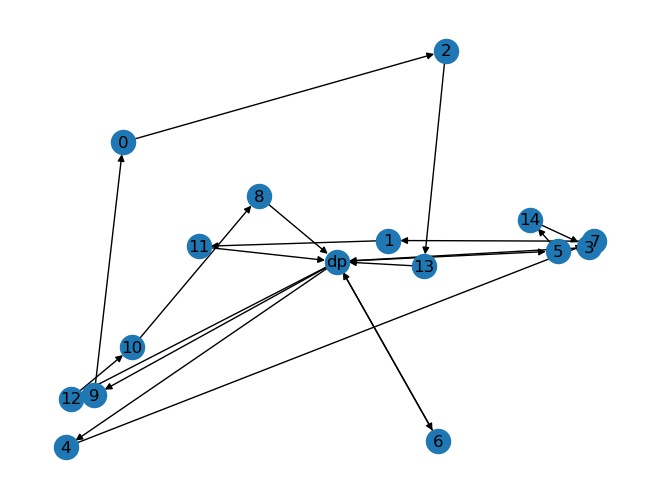

In [92]:
import time
from IPython.display import clear_output

# Specify fixed positions for the nodes
pos = {i: (random.random(), random.random()) for i in ["dp"]+[i for i in range(15)]}
pos['dp'] = (0.5,0.5)
plot_routes(route, pos)
for i in range(14):
    clear_output(wait=True)
    
    plot_routes(get_voisinage(i,route),pos)

    time.sleep(1)

In [93]:
nombre_clients = 10
Sol_init = get_solution_random(nombre_client)

In [94]:
def get_voisinage(i,route):
    route_out = []
    if i==nombre_client-1:
        route_out =route
    else:
        G= list(itertools.chain.from_iterable(route))
        G[i],G[i+1] = G[i+1],G[i]
        route_out = get_route_version2(G,time_window,Q)
    return route_out

In [95]:
import gym
from gym import spaces
import numpy as np
n = nombre_client + 1

class DQNEnv(gym.Env):
    def __init__(self):
        self.observation_space = spaces.Box(low=0, high=1, shape=(1,n*n))
        self.action_space = spaces.Discrete(nombre_client)
        self.state = np.array(get_matrice_adjacence(Sol_init)).reshape(n*n,)
        self.state_routes = Sol_init
        self.num_iterations = 100
        self.done = False
        
        self.pos = {i: (random.random(), random.random()) for i in ["dp"]+[i for i in range(n)]}
        self.pos['dp'] = (0.5,0.5)

    def reset(self):
        self.state = np.array(get_matrice_adjacence(Sol_init)).reshape(n*n,)
        self.done = False
        self.num_iterations = 100
        return self.state

    def step(self, action):
        
        reward = cout(self.state_routes)
        self.state_routes = get_voisinage(action, self.state_routes)
        self.num_iterations-=1
        reward =reward - cout(self.state_routes)
        self.state = np.array(get_matrice_adjacence(self.state_routes)).reshape(n*n,)
        
        if self.num_iterations==0:
            self.done = True
        else:
            self.done = False
        return self.state, reward, self.done, {}
        
    def render(self):
        
        clear_output()
    
        plot_routes(self.state_routes, self.pos)
        
        time.sleep(0.1)
        
        
        

        

        

In [96]:
env = DQNEnv()
np.shape(env.reset())


(121,)

KeyboardInterrupt: 

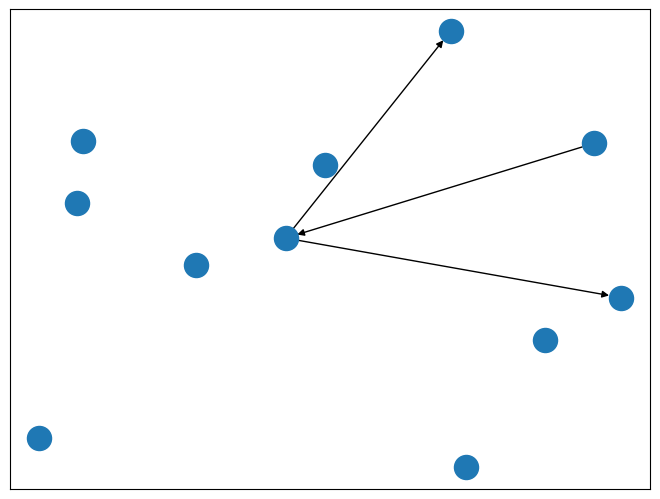

In [34]:


episodes = 3
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))

In [97]:
def build_model(nombre_client):
    model = Sequential()
    model.add(Flatten(input_shape=(1,(nombre_client+1)*(nombre_client+1))))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(nombre_client, activation='linear'))
    return model


In [98]:
model = build_model(nombre_client)

In [183]:
model(state.reshape(1,11*11))

<tf.Tensor 'sequential_15/dense_35/BiasAdd:0' shape=(1, 10) dtype=float32>

In [99]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

model = build_model(nombre_client)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 121)               0         
                                                                 
 dense_12 (Dense)            (None, 24)                2928      
                                                                 
 dense_13 (Dense)            (None, 24)                600       
                                                                 
 dense_14 (Dense)            (None, 10)                250       
                                                                 
Total params: 3,778
Trainable params: 3,778
Non-trainable params: 0
_________________________________________________________________


In [100]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [101]:
dqn = build_agent(model, nombre_client)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=30000, visualize=False, verbose=1)

D:\Documents\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Training for 30000 steps ...
Interval 1 (0 steps performed)


D:\Documents\anaconda3\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    1/10000 [..............................] - ETA: 35:17 - reward: 34.2913

D:\Documents\anaconda3\lib\site-packages\rl\memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


10000/10000 [==============================] - 76s 8ms/step - reward: -3.9949e-04
100 episodes - episode_reward: -0.040 [-368.815, 344.025] - loss: 685.171 - mae: 152.852 - mean_q: 195.489

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 75s 8ms/step - reward: -0.0103
100 episodes - episode_reward: -1.033 [-330.297, 325.076] - loss: 483.513 - mae: 216.270 - mean_q: 259.403

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 73s 7ms/step - reward: -0.0049
done, took 225.059 seconds


In [26]:
A = np.array([[3,2],[7,8]])
np.shape((A.reshape(4,)))


(4,)

In [102]:
scores = dqn.test(env, nb_episodes=100, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 100 episodes ...
Episode 1: reward: 1.988, steps: 100
Episode 2: reward: -1.988, steps: 100
Episode 3: reward: 1.988, steps: 100
Episode 4: reward: -1.988, steps: 100
Episode 5: reward: 1.988, steps: 100
Episode 6: reward: -1.988, steps: 100
Episode 7: reward: 1.988, steps: 100
Episode 8: reward: -1.988, steps: 100
Episode 9: reward: 1.988, steps: 100
Episode 10: reward: -1.988, steps: 100
Episode 11: reward: 1.988, steps: 100
Episode 12: reward: -1.988, steps: 100
Episode 13: reward: 1.988, steps: 100
Episode 14: reward: -1.988, steps: 100
Episode 15: reward: 1.988, steps: 100
Episode 16: reward: -1.988, steps: 100
Episode 17: reward: 1.988, steps: 100
Episode 18: reward: -1.988, steps: 100
Episode 19: reward: 1.988, steps: 100
Episode 20: reward: -1.988, steps: 100
Episode 21: reward: 1.988, steps: 100
Episode 22: reward: -1.988, steps: 100
Episode 23: reward: 1.988, steps: 100
Episode 24: reward: -1.988, steps: 100
Episode 25: reward: 1.988, steps: 100
Episode 26: reward

In [144]:
episodes = 1
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    while not done:
        #env.render()
        print(cout(env.state_routes))
        action =np.argmax(dqn.model.predict(state.reshape([1,1,n*n])))
        n_state, reward, done, info = env.step(action)
        score+=reward
        state = n_state
        
        
    print('Episode:{} Score:{}'.format(episode, score))

665.3942282325445
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.1238904910094
730.9672169149516
677.123890

array([[587.984  , 608.47986, 589.8495 , 589.38855, 584.2163 , 573.2494 ,
        605.05023, 585.6527 , 585.64636, 589.1503 ]], dtype=float32)

In [112]:
dqn.save_weights('dqn_weights2.h5f', overwrite=True)

In [113]:
del model
del dqn
del env

In [117]:
env = DQNEnv()
actions = nombre_client
model = build_model(nombre_clients)
dqn = build_agent(model, nombre_clients)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])



D:\Documents\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [118]:
dqn.load_weights('dqn_weights.h5f')


In [115]:
print(nombre_client)
print(nombre_clients)


10
10


In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 121)               0         
                                                                 
 dense_3 (Dense)             (None, 24)                2928      
                                                                 
 dense_4 (Dense)             (None, 24)                600       
                                                                 
 dense_5 (Dense)             (None, 10)                250       
                                                                 
Total params: 3,778
Trainable params: 3,778
Non-trainable params: 0
_________________________________________________________________


AttributeError: 'DQNAgent' object has no attribute 'summary'

In [73]:
dqn

In [75]:
dqn.save_weights('dqn_weights.h5f', overwrite=True)

In [79]:
del model
del dqn
del env


env = DQNEnv()
actions = env.action_space.n
states = env.observation_space.shape[0]
model = build_model(states, actions)
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

NameError: name 'dqn' is not defined